## All you need is ♥️… And a pet!

Some of you didn't get any flower on Valentine's day but you worry not, Jerry has a solution for you. Get ready to adopt a pet!

<img src="img/dataset-cover.jpg" width="920">

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from itertools import combinations 
import ast
from sklearn.linear_model import LogisticRegression
import seaborn as sn
%matplotlib inline

data_folder = './data/'

### A) Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). 
- Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. 
- Standardize the values of each feature in the data to have mean 0 and variance 1.

The use of external libraries is not permitted in part A, except for numpy and pandas. 
If you notice missing values in the imported entries, you have to deal with them. Make informed choices.

In [2]:
columns = ['animal_type', 'intake_year', 'intake_condition', 'intake_number', 'intake_type', 'sex_upon_intake', \
          'age_upon_intake_(years)', 'time_in_shelter_days', 'sex_upon_outcome', 'age_upon_outcome_(years)', \
          'outcome_type']
original_data = pd.read_csv(data_folder+'aac_intakes_outcomes.csv', usecols=columns)

In [3]:
print('The length of the data with all rows is : {}'.format(len(original_data)))
original_data.dropna(inplace=True)
print('The length of the data without the rows with nan value is: {}'.format(len(original_data)))

The length of the data with all rows is : 79672
The length of the data without the rows with nan value is: 79661


In [4]:
display(original_data.head())

,outcome_type,sex_upon_outcome,age_upon_outcome_(years),animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days
0,Return to Owner,Neutered Male,10.0,Dog,Normal,Stray,Neutered Male,10.0,2017,1.0,0.588194
1,Return to Owner,Neutered Male,7.0,Dog,Normal,Public Assist,Neutered Male,7.0,2014,2.0,1.259722
2,Return to Owner,Neutered Male,6.0,Dog,Normal,Public Assist,Neutered Male,6.0,2014,3.0,1.113889
3,Transfer,Neutered Male,10.0,Dog,Normal,Owner Surrender,Neutered Male,10.0,2014,1.0,4.970139
4,Return to Owner,Neutered Male,16.0,Dog,Injured,Public Assist,Neutered Male,16.0,2013,1.0,0.119444


In [5]:
print(original_data['outcome_type'].value_counts())

outcome_type
Adoption           33594
Transfer           23799
Return to Owner    14790
Euthanasia          6244
Died                 690
Disposal             304
Rto-Adopt            179
Missing               46
Relocate              15
Name: count, dtype: int64


In [6]:
# Convert outcome_type to binary: 1 for 'Adoption', 0 for all other categories
original_data['outcome_type'] = (original_data['outcome_type'] == 'Adoption').astype(int)

# Print value counts to verify
print(original_data['outcome_type'].value_counts())

outcome_type
0    46067
1    33594
Name: count, dtype: int64


In [7]:
display(original_data.head())

,outcome_type,sex_upon_outcome,age_upon_outcome_(years),animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days
0,0,Neutered Male,10.0,Dog,Normal,Stray,Neutered Male,10.0,2017,1.0,0.588194
1,0,Neutered Male,7.0,Dog,Normal,Public Assist,Neutered Male,7.0,2014,2.0,1.259722
2,0,Neutered Male,6.0,Dog,Normal,Public Assist,Neutered Male,6.0,2014,3.0,1.113889
3,0,Neutered Male,10.0,Dog,Normal,Owner Surrender,Neutered Male,10.0,2014,1.0,4.970139
4,0,Neutered Male,16.0,Dog,Injured,Public Assist,Neutered Male,16.0,2013,1.0,0.119444


In [8]:
# Print value counts for all columns to decide which ones are categorical
for col in original_data.columns:
    print(f"Value counts for {col}:\n")
    print(original_data[col].value_counts())
    print("\n" + "="*50 + "\n")

Value counts for outcome_type:

outcome_type
0    46067
1    33594
Name: count, dtype: int64


Value counts for sex_upon_outcome:

sex_upon_outcome
Neutered Male    28292
Spayed Female    25549
Intact Male       9730
Intact Female     9306
Unknown           6784
Name: count, dtype: int64


Value counts for age_upon_outcome_(years):

age_upon_outcome_(years)
1.000000     14747
2.000000     11542
0.164384      9246
3.000000      5277
0.246575      3401
0.082192      3393
4.000000      3044
5.000000      2747
0.328767      2417
0.410959      1955
0.493151      1905
6.000000      1850
8.000000      1588
7.000000      1572
0.057534      1474
0.038356      1340
0.821918      1237
0.076712      1204
0.657534      1201
10.000000     1191
0.575342       986
0.019178       953
9.000000       839
0.739726       705
12.000000      613
0.904110       512
11.000000      444
13.000000      399
14.000000      255
0.008219       238
0.005479       226
15.000000      214
0.002740       157
0.016438     

In [9]:
# Define categorical columns to be one-hot encoded
categorical_columns = ['sex_upon_outcome', 'animal_type', 'intake_condition', 'intake_type', 'sex_upon_intake']

# Apply One-Hot Encoding to selected categorical columns and update the original dataframe
original_data = pd.get_dummies(original_data, columns=categorical_columns, drop_first=True)

# Print the first few rows to verify the transformation
print(original_data.head())

# Print the updated column names to check the new one-hot encoded features
print("Updated columns:", original_data.columns)

   outcome_type  age_upon_outcome_(years)  age_upon_intake_(years)  \
0             0                      10.0                     10.0   
1             0                       7.0                      7.0   
2             0                       6.0                      6.0   
3             0                      10.0                     10.0   
4             0                      16.0                     16.0   

   intake_year  intake_number  time_in_shelter_days  \
0         2017            1.0              0.588194   
1         2014            2.0              1.259722   
2         2014            3.0              1.113889   
3         2014            1.0              4.970139   
4         2013            1.0              0.119444   

   sex_upon_outcome_Intact Male  sex_upon_outcome_Neutered Male  \
0                         False                            True   
1                         False                            True   
2                         False                

In [10]:
display(original_data.head())

,outcome_type,age_upon_outcome_(years),age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown,...,intake_condition_Pregnant,intake_condition_Sick,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,intake_type_Wildlife,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown
0,0,10.0,10.0,2017,1.0,0.588194,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
1,0,7.0,7.0,2014,2.0,1.259722,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
2,0,6.0,6.0,2014,3.0,1.113889,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
3,0,10.0,10.0,2014,1.0,4.970139,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False
4,0,16.0,16.0,2013,1.0,0.119444,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False


The code below can used to split the data to training/testing. The `data_to_split` should be the clean dataframe from A)

In [11]:
data_to_split = original_data

def split_set(data_to_split, ratio=0.8):
    mask = np.random.rand(len(data_to_split)) < ratio
    return [data_to_split[mask].reset_index(drop=True), data_to_split[~mask].reset_index(drop=True)]

[train, test] = split_set(data_to_split)

In [12]:
# Identify numerical columns that were NOT one-hot encoded (i.e., the ones we didn't apply get_dummies to)
numerical_columns = [col for col in original_data.columns if col not in categorical_columns and col != 'outcome_type']

# Compute mean and standard deviation from the training set only
mean_train = train[numerical_columns].mean()
std_train = train[numerical_columns].std()

# Avoid division by zero for constant columns
std_train[std_train == 0] = 1

# Standardize train and test sets using training set statistics
train[numerical_columns] = (train[numerical_columns] - mean_train) / std_train
test[numerical_columns] = (test[numerical_columns] - mean_train) / std_train  # Use train stats!

# Print standardized training set sample
print("Standardized train dataset:\n", train.head())

# Print standardized test set sample
print("Standardized test dataset:\n", test.head())

Standardized train dataset:
    outcome_type  age_upon_outcome_(years)  age_upon_intake_(years)  \
0             0                  2.713709                 2.731444   
1             0                  1.677704                 1.693207   
2             0                  1.332369                 1.347127   
3             0                  2.713709                 2.731444   
4             0                  4.440385                 4.461841   

   intake_year  intake_number  time_in_shelter_days  \
0     1.200519      -0.277543             -0.391191   
1    -1.105393       1.900924             -0.374971   
2    -1.105393       4.079392             -0.378494   
3    -1.105393      -0.277543             -0.285355   
4    -1.874030      -0.277543             -0.384364   

   sex_upon_outcome_Intact Male  sex_upon_outcome_Neutered Male  \
0                     -0.372241                        1.346970   
1                     -0.372241                        1.346970   
2                 

### B) Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. 
- For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. 

- The features in the testing set must be matched with the traning set.

- You can use the functions below to compute and plot a confusion matrix as well as compute all relevant scores

In [13]:
def compute_confusion_matrix(true_label, prediction_proba, decision_threshold=0.5): 
    
    predict_label = (prediction_proba[:,1]>decision_threshold).astype(int)   
                                                                                                                       
    TP = np.sum(np.logical_and(predict_label==1, true_label==1))
    TN = np.sum(np.logical_and(predict_label==0, true_label==0))
    FP = np.sum(np.logical_and(predict_label==1, true_label==0))
    FN = np.sum(np.logical_and(predict_label==0, true_label==1))
    
    confusion_matrix = np.asarray([[TP, FP],
                                    [FN, TN]])
    return confusion_matrix


def plot_confusion_matrix(confusion_matrix):
    [[TP, FP],[FN, TN]] = confusion_matrix
    label = np.asarray([['TP {}'.format(TP), 'FP {}'.format(FP)],
                        ['FN {}'.format(FN), 'TN {}'.format(TN)]])
    
    df_cm = pd.DataFrame(confusion_matrix, index=['Yes', 'No'], columns=['Positive', 'Negative']) 
    
    return sn.heatmap(df_cm, cmap='YlOrRd', annot=label, annot_kws={"size": 16}, cbar=False, fmt='')


def compute_all_score(confusion_matrix, t=0.5):
    [[TP, FP],[FN, TN]] = confusion_matrix.astype(float)
    
    accuracy =  (TP+TN)/np.sum(confusion_matrix)
    
    precision_positive = TP/(TP+FP) if (TP+FP) !=0 else np.nan
    precision_negative = TN/(TN+FN) if (TN+FN) !=0 else np.nan
    
    recall_positive = TP/(TP+FN) if (TP+FN) !=0 else np.nan
    recall_negative = TN/(TN+FP) if (TN+FP) !=0 else np.nan

    F1_score_positive = 2 *(precision_positive*recall_positive)/(precision_positive+recall_positive) if (precision_positive+recall_positive) !=0 else np.nan
    F1_score_negative = 2 *(precision_negative*recall_negative)/(precision_negative+recall_negative) if (precision_negative+recall_negative) !=0 else np.nan

    return [t, accuracy, precision_positive, recall_positive, F1_score_positive, precision_negative, recall_negative, F1_score_negative]

In [14]:
from sklearn.linear_model import LogisticRegression

# Prepare feature matrices and labels
X_train = train.drop(columns=['outcome_type'])  # Features
y_train = train['outcome_type']  # Labels
X_test = test.drop(columns=['outcome_type'])
y_test = test['outcome_type']

# Train Logistic Regression with a high iteration limit (effectively no limit)
log_reg = LogisticRegression(max_iter=10_000)  # Allows the model to run until convergence

log_reg.fit(X_train, y_train)

# Predict probabilities on test set
y_test_proba = log_reg.predict_proba(X_test)

# Print some probability predictions
print("Sample predicted probabilities:\n", y_test_proba[:5])


Sample predicted probabilities:
 [[0.99504443 0.00495557]
 [0.94411839 0.05588161]
 [0.98799521 0.01200479]
 [0.98983473 0.01016527]
 [0.90350247 0.09649753]]


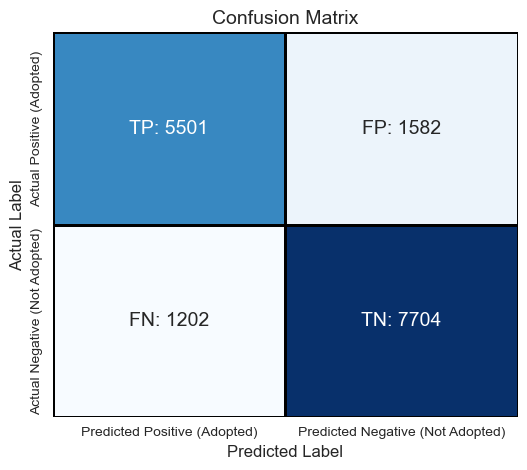

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Compute confusion matrix
conf_matrix = compute_confusion_matrix(y_test, y_test_proba, decision_threshold=0.5)

# Define labels
label_text = np.array([["True Positives", "False Positives"],
                        ["False Negatives", "True Negatives"]])

# Create a DataFrame for better labeling
df_cm = pd.DataFrame(conf_matrix,
                     index=["Actual Positive (Adopted)", "Actual Negative (Not Adopted)"],
                     columns=["Predicted Positive (Adopted)", "Predicted Negative (Not Adopted)"])

# Create a combined annotation with counts
annot = np.array([[f"TP: {conf_matrix[0,0]}", f"FP: {conf_matrix[0,1]}"],
                  [f"FN: {conf_matrix[1,0]}", f"TN: {conf_matrix[1,1]}"]])

# Plot the heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=annot, fmt='', cmap="Blues", cbar=False, linewidths=2, linecolor="black", annot_kws={"size": 14})

# Set title
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("Actual Label", fontsize=12)

# Show the plot
plt.show()


Confusion Matrix:
 [[5501 1582]
 [1202 7704]]


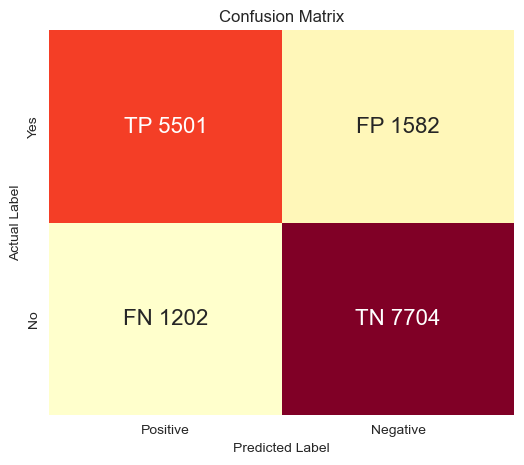


Model Performance Metrics:
Threshold: 0.5000
Accuracy: 0.8259
Precision (+): 0.7766
Recall (+): 0.8207
F1-Score (+): 0.7981
Precision (-): 0.8650
Recall (-): 0.8296
F1-Score (-): 0.8470


In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
decision_threshold = 0.5
conf_matrix = compute_confusion_matrix(y_test, y_test_proba, decision_threshold)

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
plot_confusion_matrix(conf_matrix)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# Compute accuracy, precision, recall, and F1-score
scores = compute_all_score(conf_matrix, decision_threshold)

# Print performance metrics
metrics = ["Threshold", "Accuracy", "Precision (+)", "Recall (+)", "F1-Score (+)",
           "Precision (-)", "Recall (-)", "F1-Score (-)"]

print("\nModel Performance Metrics:")
for metric, value in zip(metrics, scores):
    print(f"{metric}: {value:.4f}")


In [17]:
#show confusion matrix and scores

### C) Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall  and F1-score (with respect to both classes) as a function of the threshold.

Here we expect one plot for the accuracy and then 2 sets of 3 plots for each of the classes, i.e. precision, recall and F1 score for the positive class and precision, recall and F1 score for the negative class.

### Comment on the results. What do you observe?

In clinic 3, we will focus on the AUROC curve.

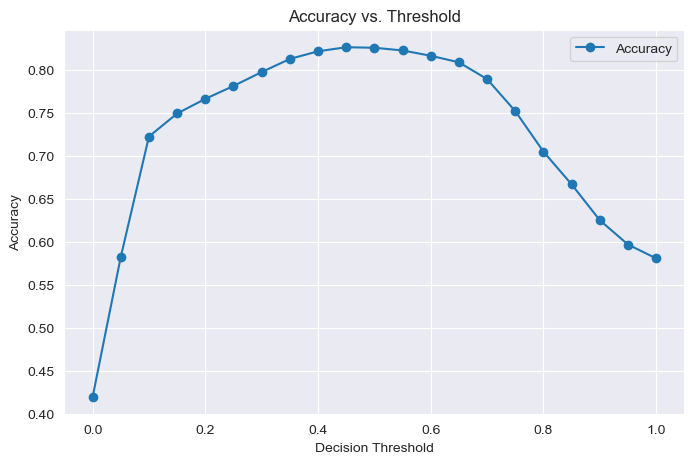

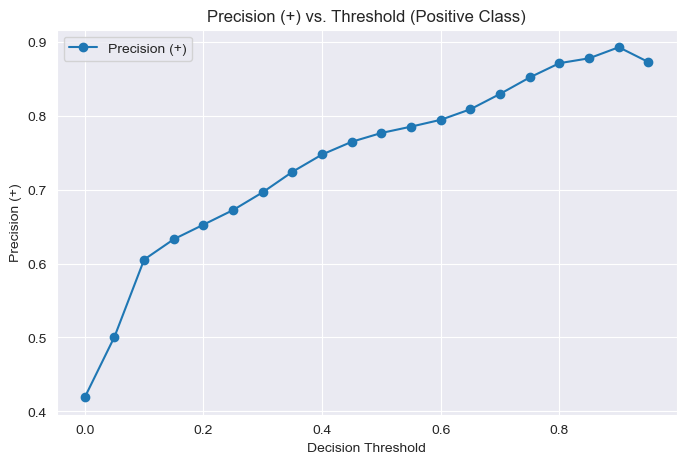

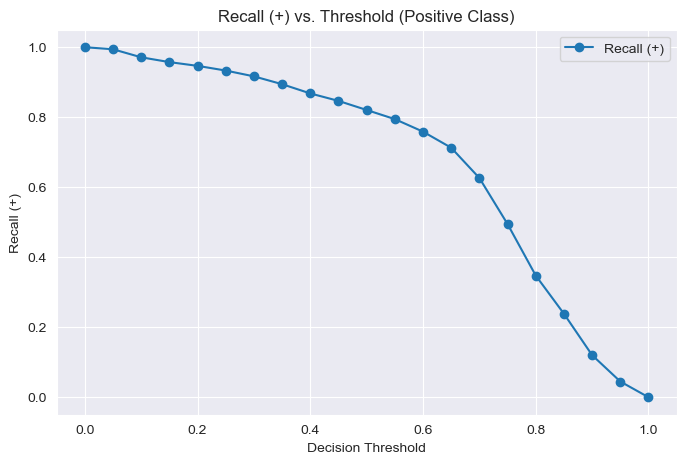

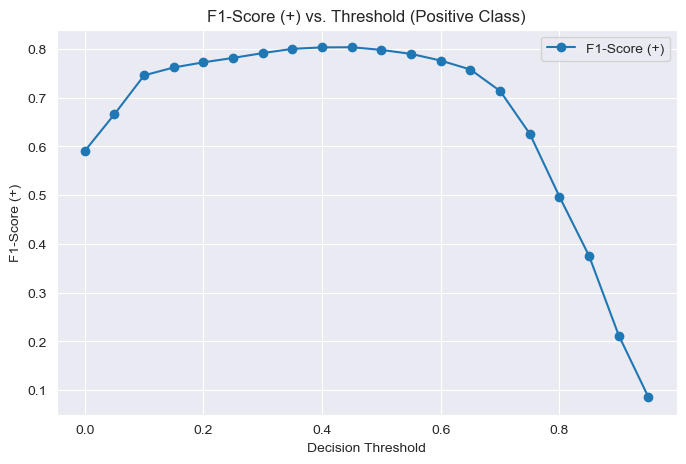

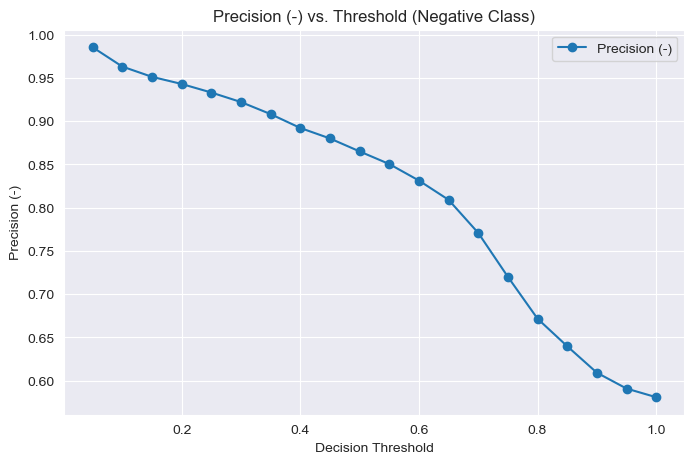

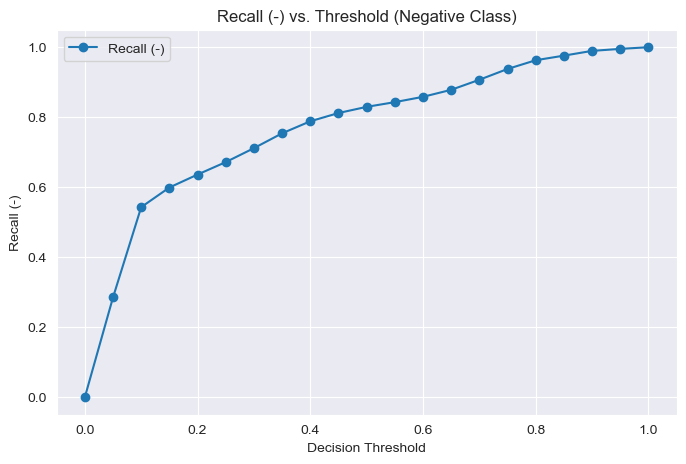

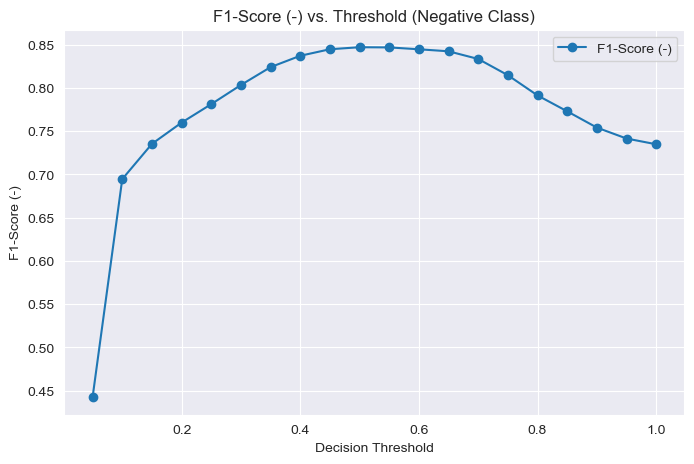

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define threshold range
thresholds = np.arange(0.0, 1.05, 0.05)  # From 0 to 1 with step size 0.05

# Lists to store scores
accuracies = []
precision_positive = []
recall_positive = []
f1_positive = []
precision_negative = []
recall_negative = []
f1_negative = []

# Compute scores for each threshold
for t in thresholds:
    conf_matrix = compute_confusion_matrix(y_test, y_test_proba, decision_threshold=t)
    scores = compute_all_score(conf_matrix, t)

    accuracies.append(scores[1])  # Accuracy
    precision_positive.append(scores[2])  # Precision (+)
    recall_positive.append(scores[3])  # Recall (+)
    f1_positive.append(scores[4])  # F1-Score (+)
    precision_negative.append(scores[5])  # Precision (-)
    recall_negative.append(scores[6])  # Recall (-)
    f1_negative.append(scores[7])  # F1-Score (-)

# Plot Accuracy
plt.figure(figsize=(8, 5))
plt.plot(thresholds, accuracies, marker='o', linestyle='-', label='Accuracy')
plt.xlabel('Decision Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold')
plt.grid(True)
plt.legend()
plt.show()

# Plot each metric separately for the Positive Class (Adopted)
metrics_pos = [precision_positive, recall_positive, f1_positive]
metric_names_pos = ["Precision (+)", "Recall (+)", "F1-Score (+)"]

for metric, name in zip(metrics_pos, metric_names_pos):
    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, metric, marker='o', linestyle='-', label=name)
    plt.xlabel('Decision Threshold')
    plt.ylabel(name)
    plt.title(f'{name} vs. Threshold (Positive Class)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Plot each metric separately for the Negative Class (Not Adopted)
metrics_neg = [precision_negative, recall_negative, f1_negative]
metric_names_neg = ["Precision (-)", "Recall (-)", "F1-Score (-)"]

for metric, name in zip(metrics_neg, metric_names_neg):
    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, metric, marker='o', linestyle='-', label=name)
    plt.xlabel('Decision Threshold')
    plt.ylabel(name)
    plt.title(f'{name} vs. Threshold (Negative Class)')
    plt.grid(True)
    plt.legend()
    plt.show()


// comments here //

### D) Plot in a bar chart the coefficients of the logistic regression sorted by their contribution to the prediction.

### Interpret the results of the coefficients

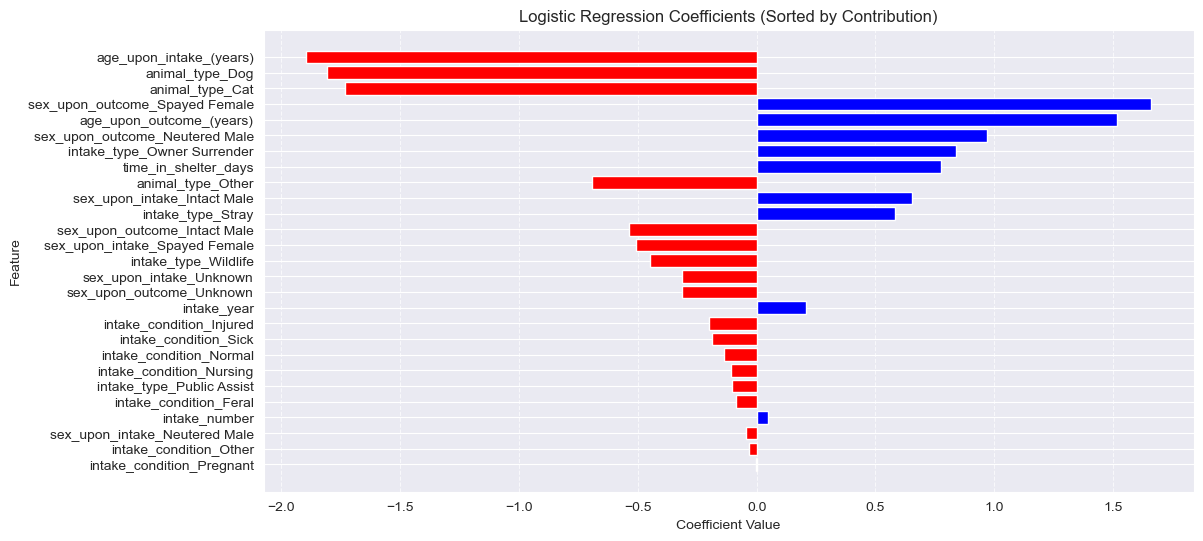

In [19]:
#show the bartplot here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Extract feature names from X_train (the features used for training)
feature_names = X_train.columns

# Get the logistic regression coefficients
coefficients = log_reg.coef_.flatten()

# Create a DataFrame for visualization
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients by absolute value (strongest contribution first)
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

# Plot the coefficients as a bar chart
plt.figure(figsize=(12, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color=['blue' if coef > 0 else 'red' for coef in coef_df['Coefficient']])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients (Sorted by Contribution)')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest contribution at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


// comments here //